In [1]:
import numpy as np

import earthkit.data
import earthkit.plots

In [2]:
obs = earthkit.data.from_source("file", "/Users/mavj/Downloads/obs.nc")
ds = obs.to_xarray().squeeze()
ds

<xarray.Dataset>
Dimensions:     (level: 382, satellite: 3, area: 6, flag: 3, time: 119)
Coordinates:
  * level       (level) float32 1.0 3.0 5.0 ... 1.296e+03 1.297e+03 1.298e+03
  * satellite   (satellite) <U7 'NPP' 'NOAA-20' 'NOAA-21'
    stream      <U15 'All_datastreams'
  * area        (area) <U18 'Globe' 'North_Pole' ... 'South_Pole'
    surface     <U12 'All_surfaces'
  * flag        (flag) <U6 'All' 'Used' 'Active'
    phase       <U11 'Not_defined'
    scan        <U11 'Not_defined'
  * time        (time) datetime64[ns] 2023-12-03T09:00:00 ... 2024-01-31T09:0...
Data variables: (12/20)
    date        (time) datetime64[ns] dask.array<chunksize=(119,), meta=np.ndarray>
    enddate     (time) datetime64[ns] dask.array<chunksize=(119,), meta=np.ndarray>
    hours       (time) int32 dask.array<chunksize=(119,), meta=np.ndarray>
    count       (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    fso         (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    fso_stdv    (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    ...          ...
    fgdep_bcor  (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    andep_bcor  (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    fg          (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    an          (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    count_all   (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
    count_used  (satellite, time, area, flag, level) float32 dask.array<chunksize=(3, 1, 6, 3, 382), meta=np.ndarray>
Attributes: (12/35)
    normalised:    True
    expver:        0001
    platform:      224
    cplatform:     NPP
    instrument:    27
    cinstrument:   CrIS
    ...            ...
    lon_inc:       360.0
    nscanes:       1
    nstreams:      1
    retention:     1
    cdatastreams:  ,All_datastreams
    label:         hist_from_cris_0001_LWDA_tovs_tb_short

In [3]:
da = ds.sel(satellite="NOAA-20", area="Globe", flag="All")

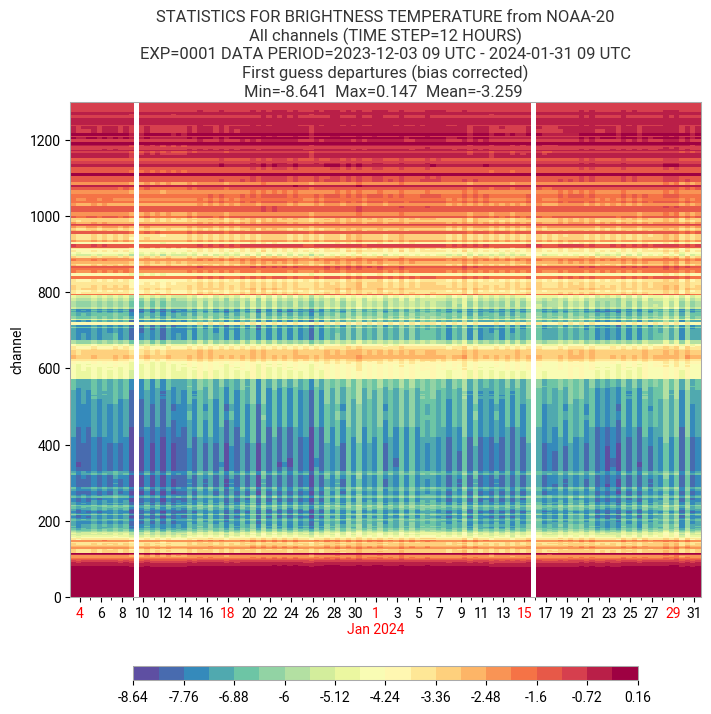

In [4]:
hovmoeller = earthkit.plots.Subplot()

hovmoeller.block(
    da, z="fgdep", levels=np.arange(-8.64, 0.17, 0.44), colors="Spectral_r",
    ticks=np.arange(-8.64, 0.17, 0.44)[::2],
)

hovmoeller.title(
    "STATISTICS FOR BRIGHTNESS TEMPERATURE from {satellite}\n"
    "All channels (TIME STEP={step} HOURS)\n"
    "EXP={expver} DATA PERIOD={time.min:%Y-%m-%d %H UTC} - {time.max:%Y-%m-%d %H UTC}\n"
    "{variable_name}\n"
    "Min={values.nanmin:.3f}  Max={values.nanmax:.3f}  Mean={values.nanmean:.3f} "
)

hovmoeller.set_major_xticks("D2", highlight={"weekday": 0})
hovmoeller.set_minor_xticks("D1")
hovmoeller.ax.set_ylabel("channel")

hovmoeller.legend(label="")

hovmoeller.show()